## Segmentation example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from opentps.core.data.images import CTImage
from opentps.core.processing.segmentation.segmentation3D import applyThreshold
from opentps.core.processing.segmentation.segmentationCT import SegmentationCT
from opentps.core.examples.syntheticData import *

27/07/2023 09:45:24 AM - root - INFO - Loading logging configuration: c:\Users\romai\anaconda3\envs\OpenTPS\lib\site-packages\opentps\core\config\logger\logging_config.json
27/07/2023 09:45:24 AM - opentps.core._loggingConfig - INFO - Log level set: INFO
27/07/2023 09:45:25 AM - opentps.core.processing.imageProcessing.cupyImageProcessing - WARNING - Cannot import Cupy module
27/07/2023 09:45:26 AM - opentps.core.processing.registration.registrationMorphons - WARNING - cupy not found.
27/07/2023 09:45:26 AM - opentps.core.processing.C_libraries.libInterp3_wrapper - WARNING - cupy not found.


#### Generate synthetic CT image and segment it

In [4]:
# GENERATE SYNTHETIC CT IMAGE
ct = createSynthetic3DCT()

# APPLY THRESHOLD SEGMENTATION
mask = applyThreshold(ct, -750)

# APPLY CT BODY SEGMENTATION
seg = SegmentationCT(ct)
body = seg.segmentBody()
bones = seg.segmentBones()
lungs = seg.segmentLungs()

# CHECK RESULTS
assert (body.imageArray[50,100,80] == True) & (body.imageArray[0,0,0] == False), f"Wrong body segmentation"
assert (bones.imageArray[85,100,50] == True) & (bones.imageArray[85,110,50] == False), f"Wrong bones segmentation"
assert (lungs.imageArray[120,100,35] == True) & (lungs.imageArray[50,100,35] == False), f"Wrong lungs segmentation"


27/07/2023 09:47:07 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - INFO - Using cupy to open mask
27/07/2023 09:47:07 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Cupy not working to open mask.
27/07/2023 09:47:07 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Scipy used to open mask.


27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - INFO - Using cupy to open mask
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Cupy not working to open mask.
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Scipy used to open mask.
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Cupy not working to erode mask.
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - INFO - Scipy used to erode mask.
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - INFO - Using cupy to open mask
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Cupy not working to open mask.
27/07/2023 09:47:08 AM - opentps.core.processing.imageProcessing.roiMasksProcessing - WARNING - Scipy used to open mask.
27/07/2023 09:47:18 AM 

#### Display results

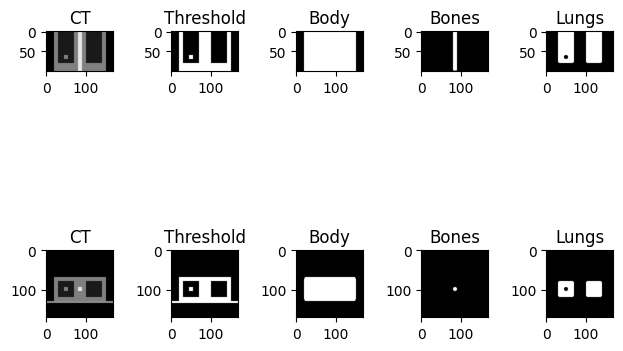

In [6]:
fig, ax = plt.subplots(2, 5,figsize = (20,10))
fig.tight_layout()
y_slice = 100
z_slice = 35 #round(ct.imageArray.shape[2] / 2) - 1
ax[0,0].imshow(ct.imageArray[:, y_slice, :].T[::-1, ::1], cmap='gray', origin='upper', vmin=-1000, vmax=1000)
ax[0,0].title.set_text('CT')
ax[0,1].imshow(mask.imageArray[:, y_slice, :].T[::-1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[0,1].title.set_text('Threshold')
ax[0,2].imshow(body.imageArray[:, y_slice, :].T[::-1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[0,2].title.set_text('Body')
ax[0,3].imshow(bones.imageArray[:, y_slice, :].T[::-1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[0,3].title.set_text('Bones')
ax[0,4].imshow(lungs.imageArray[:, y_slice, :].T[::-1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[0,4].title.set_text('Lungs')

ax[1,0].imshow(ct.imageArray[:, :, z_slice].T[::1, ::1], cmap='gray', origin='upper', vmin=-1000, vmax=1000)
ax[1,0].title.set_text('CT')
ax[1,1].imshow(mask.imageArray[:, :, z_slice].T[::1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[1,1].title.set_text('Threshold')
ax[1,2].imshow(body.imageArray[:, :, z_slice].T[::1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[1,2].title.set_text('Body')
ax[1,3].imshow(bones.imageArray[:, :, z_slice].T[::1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[1,3].title.set_text('Bones')
ax[1,4].imshow(lungs.imageArray[:, :, z_slice].T[::1, ::1], cmap='gray', origin='upper', vmin=0, vmax=1)
ax[1,4].title.set_text('Lungs')

plt.show()